#Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thedevastator/mental-health-in-tech-survey

  0% 0.00/49.3k [00:00<?, ?B/s]
100% 49.3k/49.3k [00:00<00:00, 88.2MB/s]


In [ ]:
!unzip mental-health-in-tech-survey.zip

Archive:  mental-health-in-tech-survey.zip
  inflating: survey.csv              


In [ ]:
pip install scikit-learn==1.2.2

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/survey.csv")
df

,index,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      1259 non-null   int64 
 1   Timestamp                  1259 non-null   object
 2   Age                        1259 non-null   int64 
 3   Gender                     1259 non-null   object
 4   Country                    1259 non-null   object
 5   state                      744 non-null    object
 6   self_employed              1241 non-null   object
 7   family_history             1259 non-null   object
 8   treatment                  1259 non-null   object
 9   work_interfere             995 non-null    object
 10  no_employees               1259 non-null   object
 11  remote_work                1259 non-null   object
 12  tech_company               1259 non-null   object
 13  benefits                   1259 non-null   object
 14  care_opt

In [ ]:
#Drop kolom yang ga terlalu penting berdasarkan informasi dari datasetnya di kaggle
df.drop(['index', 'Timestamp', 'Country', 'state', 'comments', 'mental_vs_physical', 'mental_health_interview', 'phys_health_interview', 'obs_consequence'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [ ]:
#Biar seragam aja headernya jadi lowercase
new_headers = {
    'Age': 'age',
    'Gender': 'gender',
    }
df = df.rename(columns=new_headers)

In [ ]:
df.describe(include='all')

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor
count,1.259000e+03,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes
freq,NaN,615,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Ngecek data NaN ditiap kolom
df.isna().sum()

age                            0
gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
dtype: int64

In [ ]:
#ganti data NaN di kolom work_interfere jadi nilai modusnya
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)

In [ ]:
#drop data NaN di self_employed
df.dropna(subset=['self_employed'], inplace=True)

In [ ]:
#cek ulang
df.isna().sum()

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
dtype: int64

In [ ]:
df.describe(include='all')

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor
count,1.241000e+03,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241
unique,NaN,49,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes
freq,NaN,605,1095,756,628,722,284,871,1015,470,494,829,637,806,554,479,910,766,505
mean,8.058021e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.838665e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Outlier on Age')

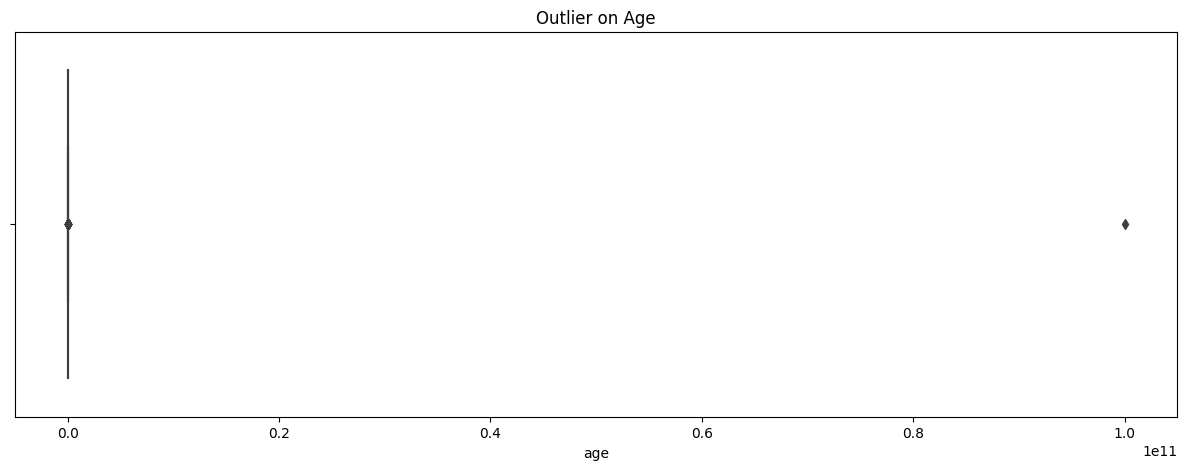

In [ ]:
#cari nilai outlier di fitur age
plt.figure(figsize=(15,5))
sns.boxplot(x=df['age'])
plt.title('Outlier on Age')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

<ipython-input-19-a36c51a2afe6>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-19-a36c51a2afe6>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [ ]:
#tampilin nilai-nilai outliernya
age_outlier = df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))['age']]
age_outlier

<ipython-input-20-138794c3a709>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  age_outlier = df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))['age']]


,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor
38,50,M,No,No,No,Sometimes,100-500,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes
143,-29,Male,No,No,No,Sometimes,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes
294,56,Male,No,No,Yes,Never,More than 1000,No,Yes,Yes,Not sure,Don't know,Don't know,Don't know,Don't know,No,Maybe,Yes,Some of them
297,60,male,No,No,No,Sometimes,More than 1000,No,Yes,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes
347,54,M,No,Yes,Yes,Never,More than 1000,No,Yes,Don't know,No,Yes,Yes,Don't know,Don't know,No,No,No,Yes
364,329,Male,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No
372,55,M,No,Yes,Yes,Rarely,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,No,No,Yes,Yes
390,99999999999,All,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No
419,55,M,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,No,Don't know,Don't know,Don't know,Yes,Maybe,No,No
466,57,M,No,Yes,Yes,Rarely,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes


In [ ]:
#hapus data outliernya
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-21-3a291507cc18>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [ ]:
#cek ulang
df

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor
18,46,male,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes
19,36,Male,Yes,Yes,No,Sometimes,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them
20,29,Male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them
21,31,male,Yes,No,No,Never,1-5,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them
22,46,Male,No,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No
1257,46,f,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No


In [ ]:
#misahin antara data categorical sama numerical
categorical_features=df.select_dtypes(include='object')
numeric_features=df.select_dtypes(include=np.number)

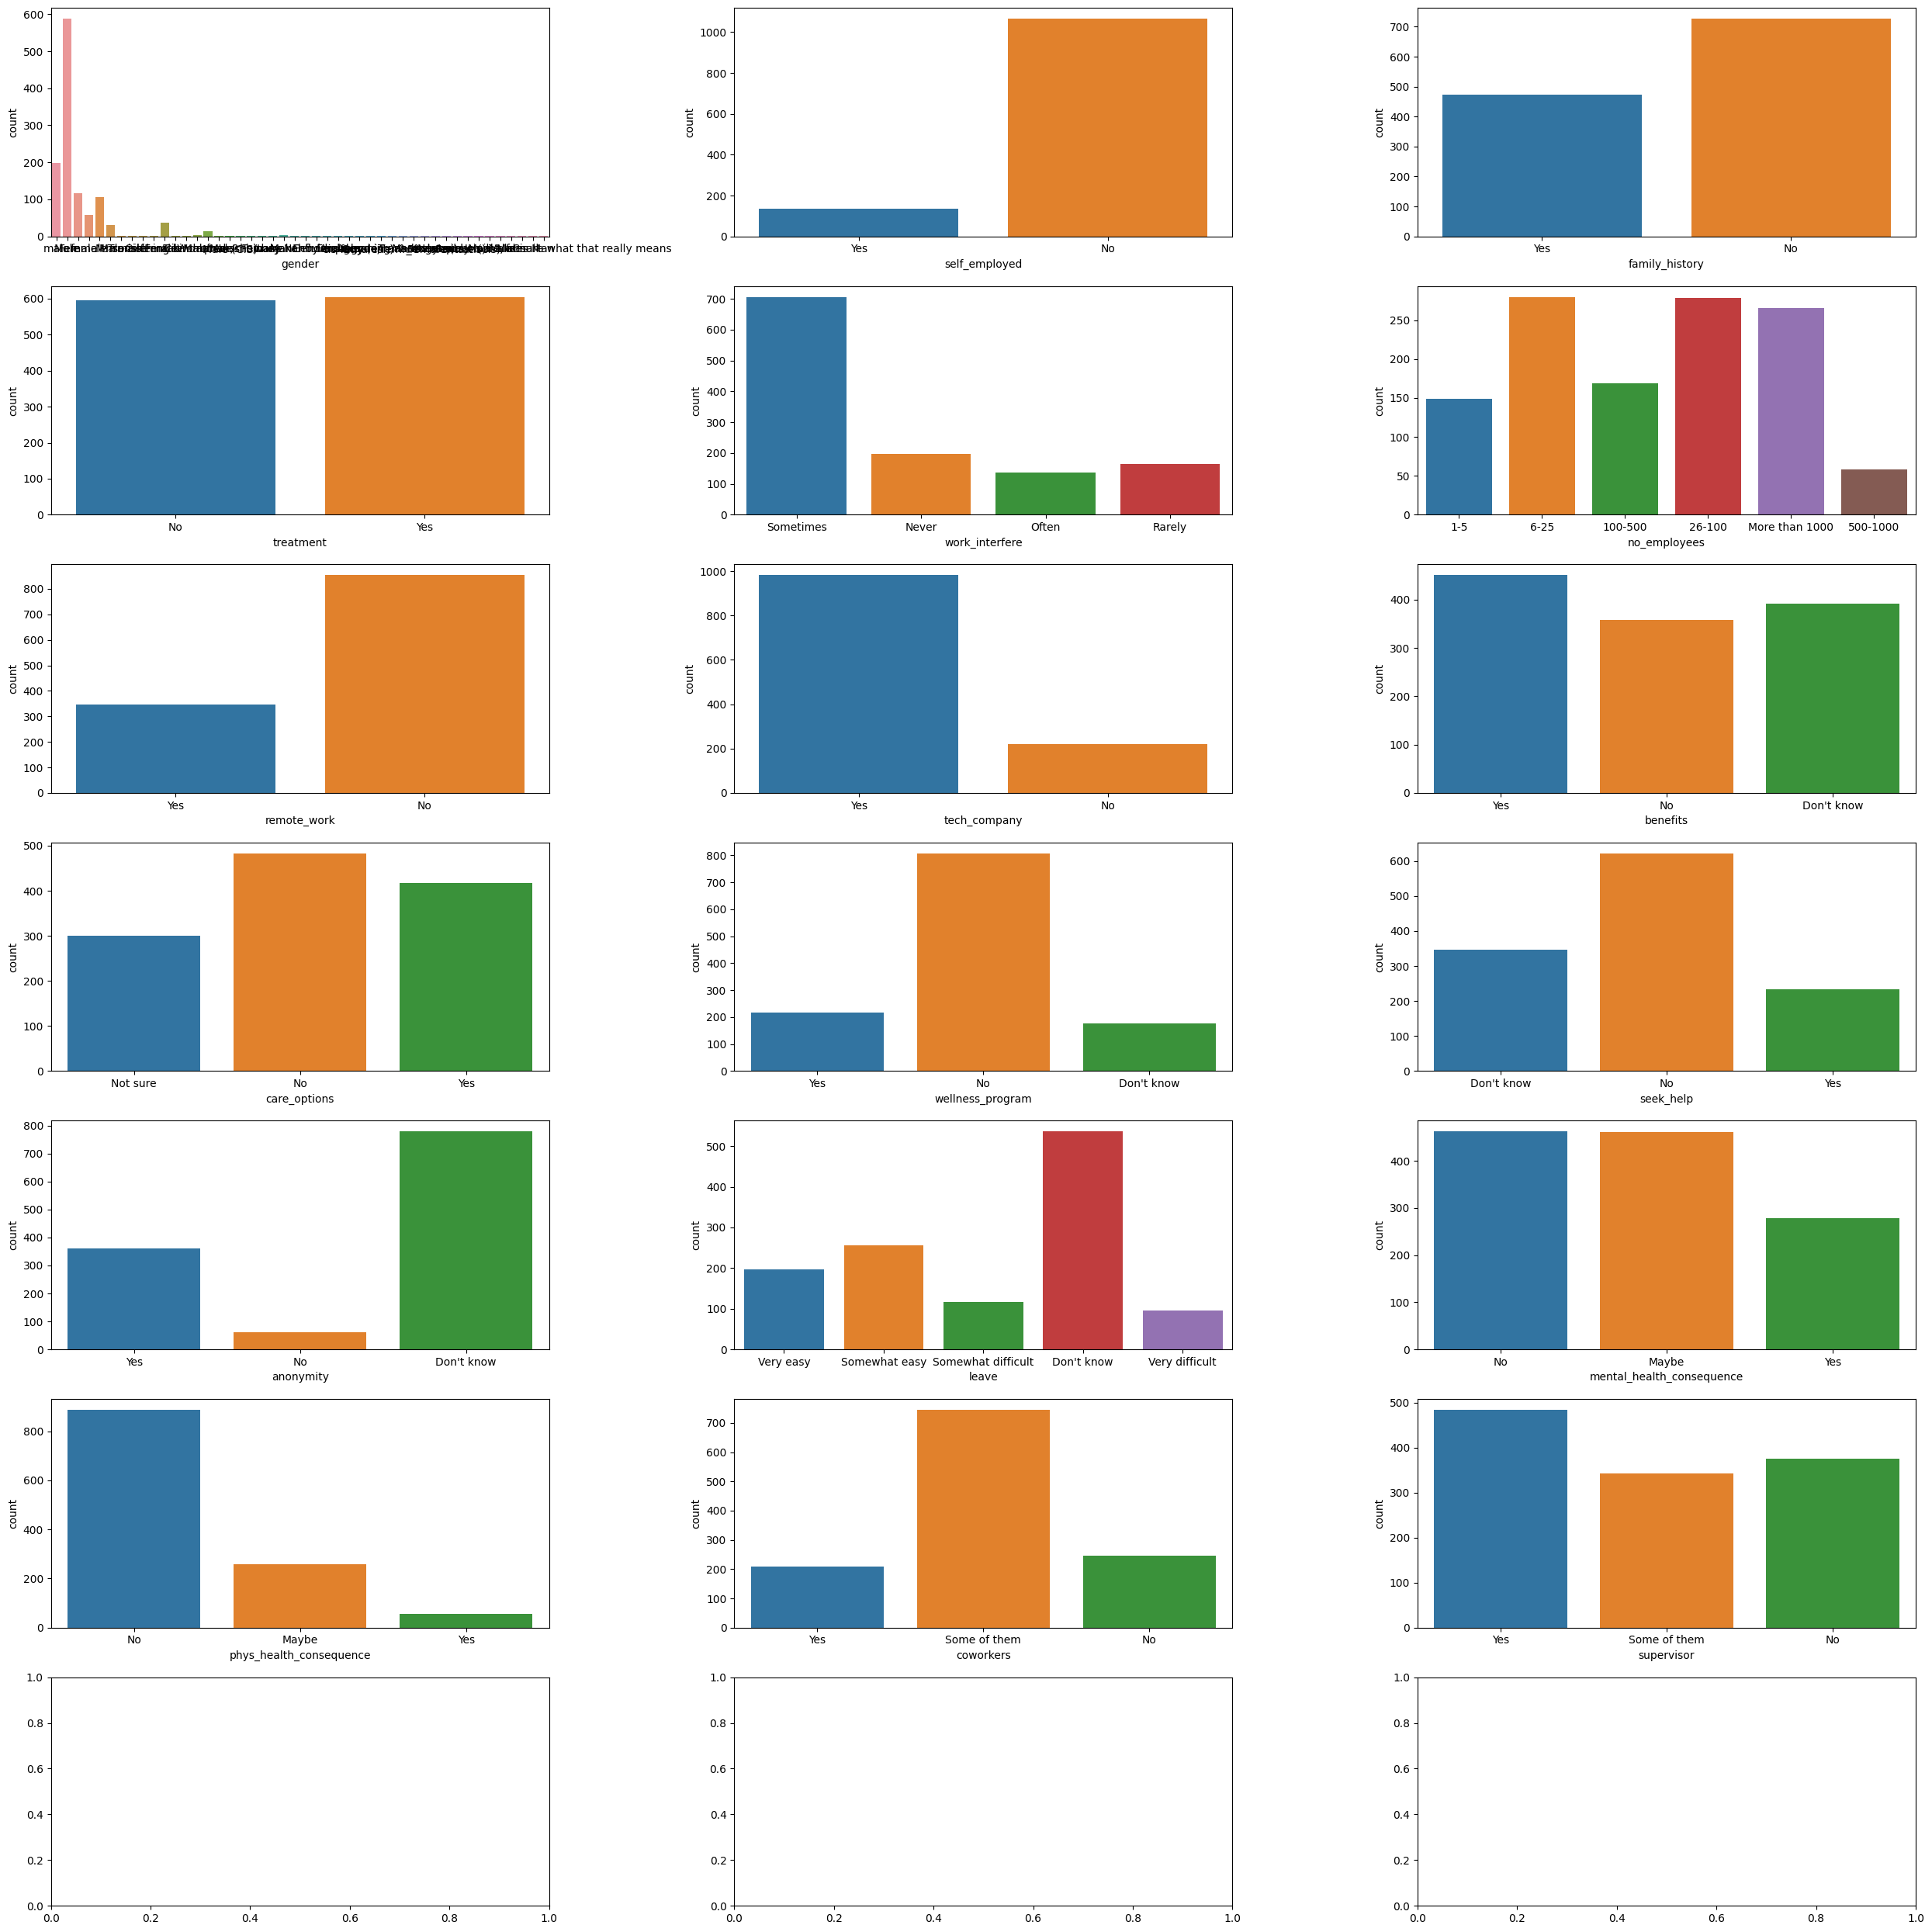

In [ ]:
#plot fitur categorical
fig, axes = plt.subplots(7, 3, figsize=(25, 25))

num_features = categorical_features.shape[1]
num_figs = 3*5

for i, column in enumerate(categorical_features.columns):
  sns.countplot(data=df, x=column, ax=axes.flatten()[i])

for i in range(num_features, num_figs):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

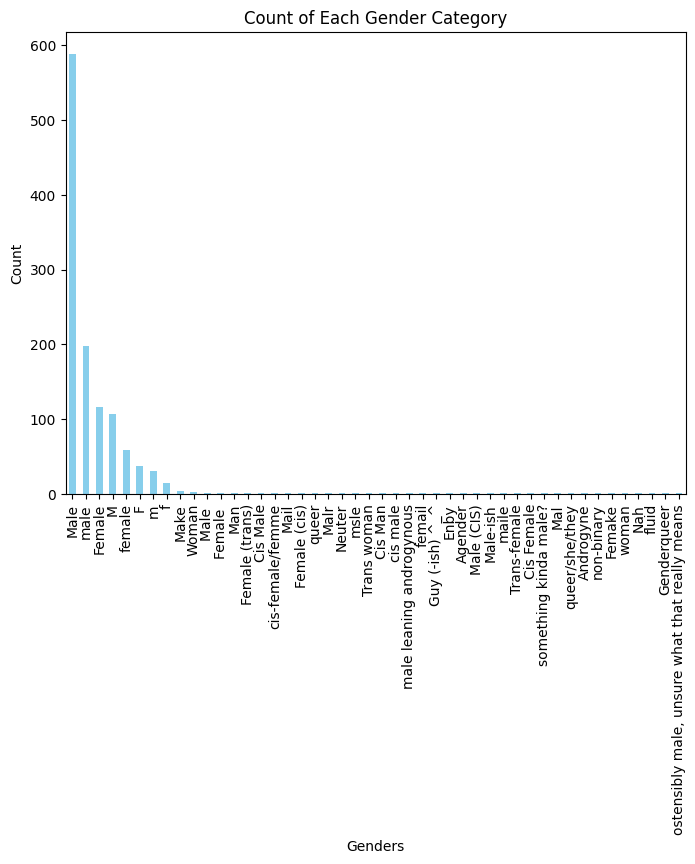

In [ ]:
#plot macam-macam gender dan jumlah datanya
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Each Gender Category')
plt.xlabel('Genders')
plt.ylabel('Count')
plt.show()

In [ ]:
#macam-macam gender
df['gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
       'Female (cis)', 'Mail', 'cis male', 'Malr', 'Male ', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [ ]:
df['gender'].value_counts()

Male                                              588
male                                              198
Female                                            117
M                                                 107
female                                             59
F                                                  38
m                                                  31
f                                                  15
Make                                                4
Woman                                               3
Male                                                2
Female                                              2
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
cis-female/femme                                    1
Mail                                                1
Female (cis)                                        1
queer                       

In [ ]:
#mapping jadi dua gender Male sama Female. Yang lgbt di drop
gender_mapping = {
    'male': 'Male',
    'M' : 'Male',
    'm' : 'Male',
    'maile' :'Male',
    'Mal' : 'Male',
    'Make' : 'Male',
    'Man' : 'Male',
    'msle' : 'Male',
    'Mail' : 'Male',
    'Malr' : 'Male',
    'Male ' : 'Male',

    'female': 'Female',
    'F' : 'Female',
    'Woman' : 'Female',
    'f' : 'Female',
    'Femake' : 'Female',
    'woman' : 'Female',
    'Female ' : 'Female',
    'femail' : 'Female'
  }

df['gender'] = df['gender'].map(gender_mapping).fillna(df['gender'])

#Fuck LGBT, We drop those fuck' lgbt genders
df = df[df['gender'].isin(['Male', 'Female'])]

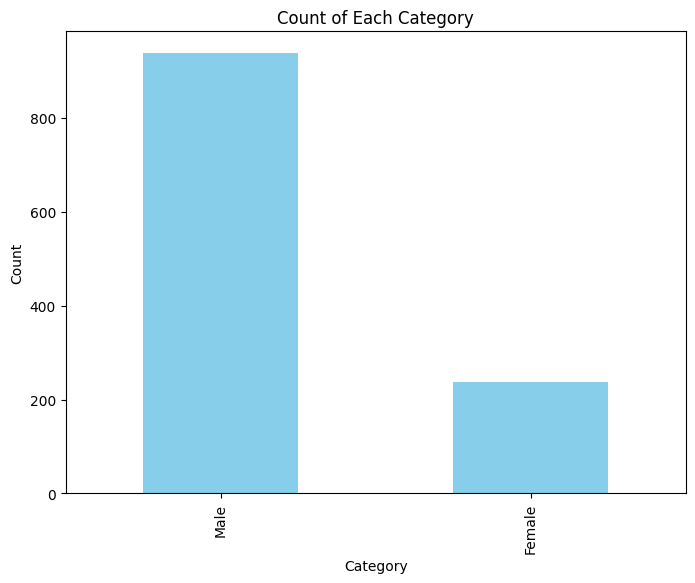

In [ ]:
#plot gender yang sekarang
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
df

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor
18,46,Male,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes
19,36,Male,Yes,Yes,No,Sometimes,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them
20,29,Male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them
21,31,Male,Yes,No,No,Never,1-5,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them
22,46,Male,No,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes
1256,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No
1257,46,Female,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No


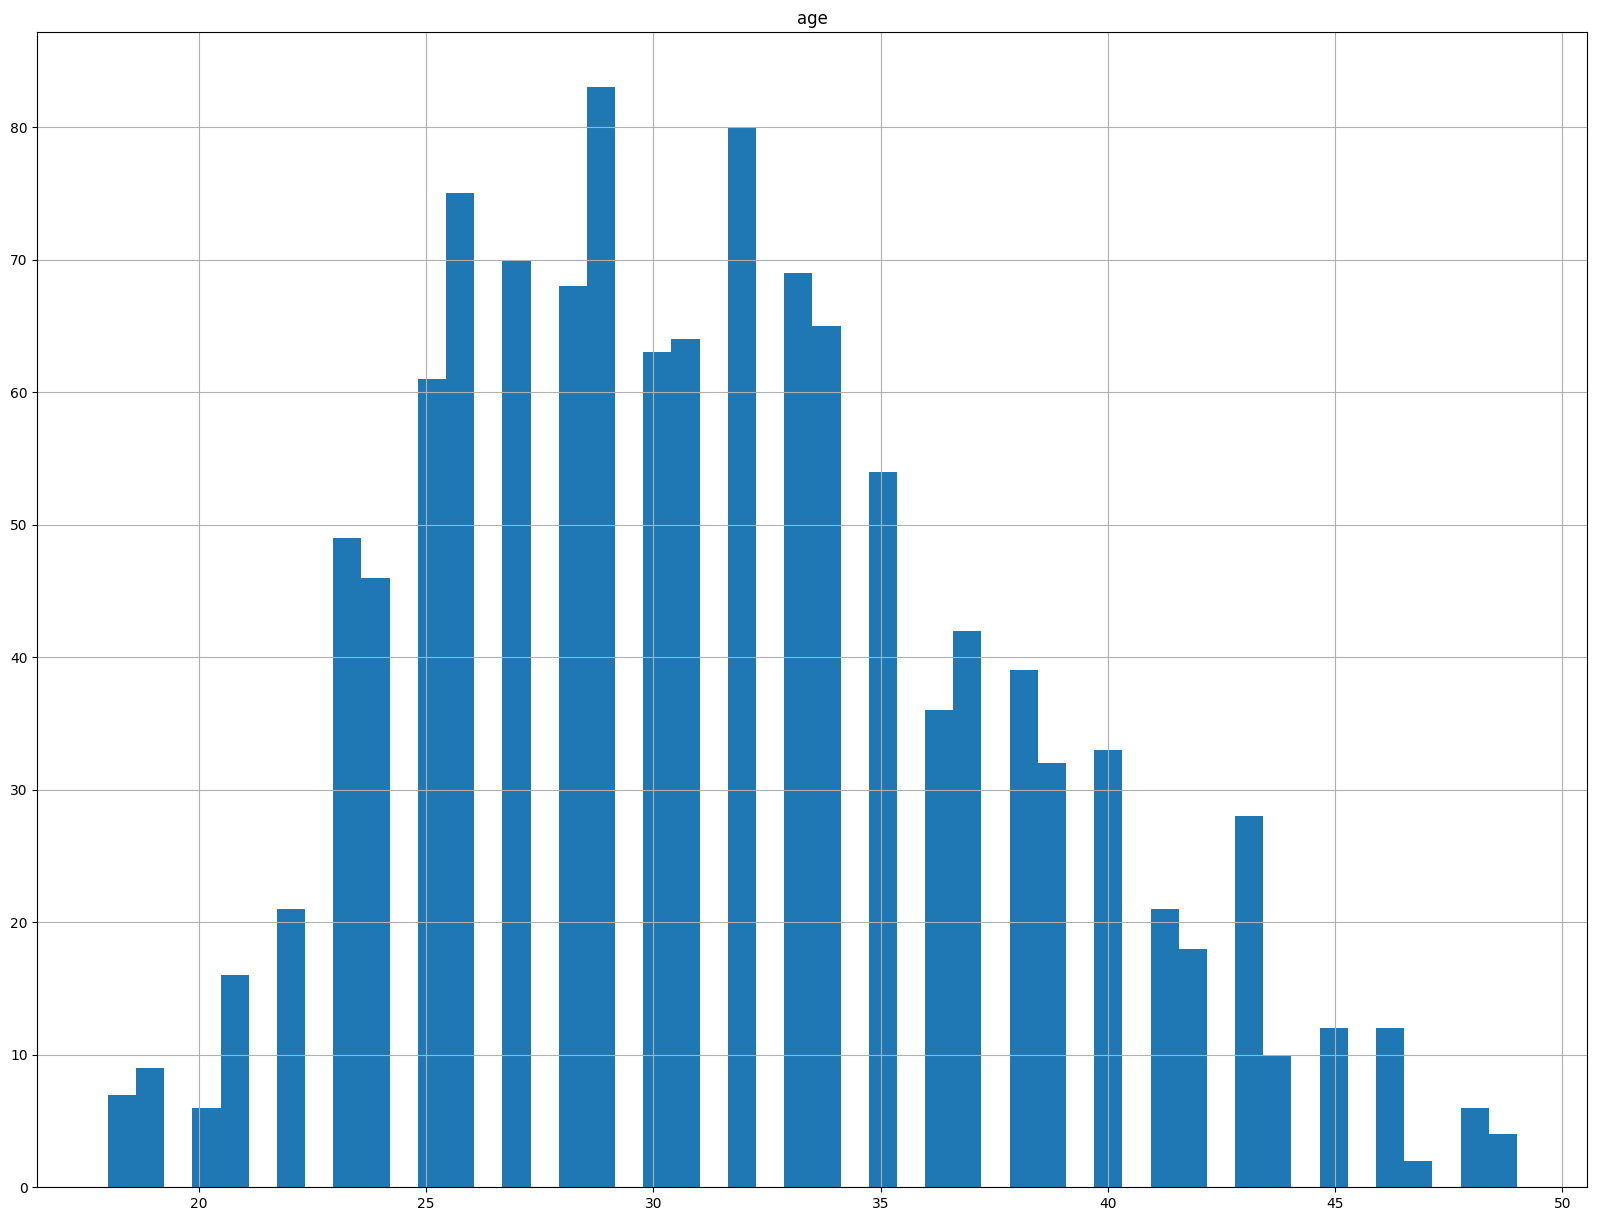

In [ ]:
#plot distribusi age
numeric_features.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
df.to_csv('survey_cleaned.csv', index=False)

# Preprocessing

In [ ]:
#one hot encoding buat data categorical
#fitur age numeric sedangkan treatment bakal jadi target
encoded_features = df.drop(['age', 'treatment'], axis=1)

for encoded_feature in encoded_features.columns:
  df = pd.concat([df, pd.get_dummies(df[encoded_feature], prefix=encoded_feature)], axis=1)
  df.drop([encoded_feature], axis=1, inplace=True)

In [ ]:
#scaling umur
scaled_features = ['age']
scaler = StandardScaler()

scaler.fit(df[scaled_features])
df[scaled_features] = scaler.transform(df.loc[:, scaled_features])

In [ ]:
label_encoding = {'Yes': 1, 'No': 0}
df['treatment'] = df['treatment'].map(label_encoding)

In [ ]:
df

,age,treatment,gender_Female,gender_Male,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,...,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes
18,2.331336,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
19,0.727945,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
20,-0.394429,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
21,-0.073751,0,0,1,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
22,2.331336,1,0,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,-0.875446,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1255,0.086589,1,0,1,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1256,0.407267,1,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0
1257,2.331336,0,1,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0


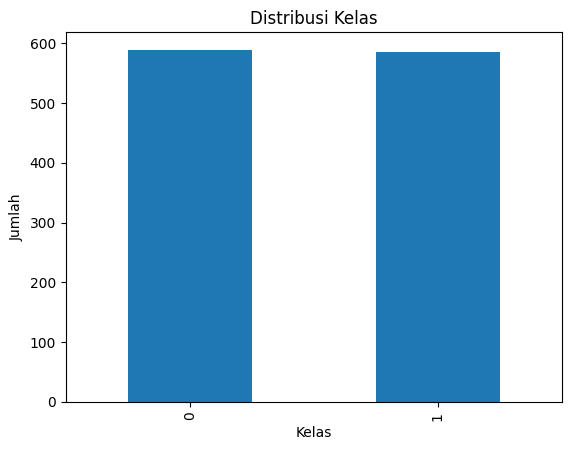

In [ ]:
df['treatment'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
plt.figure(figsize=(200, 100))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Text(0.5, 1.0, 'Correlation Matrix')

In [ ]:
df.to_csv('survey_encoded.csv', index=False)

#Modelling

##Split

In [ ]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Total data of sample in whole dataset: {len(X)}')
print(f'Total data of sample in train dataset: {len(X_train)}')
print(f'Total data of sample in test dataset: {len(X_test)}')

Total data of sample in whole dataset: 1174
Total data of sample in train dataset: 821
Total data of sample in test dataset: 353


##Random Forest

In [ ]:
rf_param_grid = {
    'n_estimators': [350, 400, 500],
    'max_depth': [20, 30, 40],
    'min_samples_split' : [2, 5, 7],
    'min_samples_leaf' : [2, 5, 7],
    'max_features' : ['sqrt', 'log2'],
    'bootstrap' : [True, False]
}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf, param_grid=rf_param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 30, 40],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [350, 400, 500]})

##AdaBoost

In [ ]:
adaboost_param_grid = {
    'n_estimators': [50, 60, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'algorithm' : ['SAMME.R', 'SAMME'],
    'estimator' : [DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=7) ]
}

adaboost = AdaBoostClassifier()

grid_search_adaboost = GridSearchCV(adaboost, param_grid=adaboost_param_grid, cv=5)
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'estimator': [DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=5),
                                       DecisionTreeClassifier(max_depth=7)],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 60, 70]})

#Evaluation

##Random Forest

In [ ]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 400}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test)

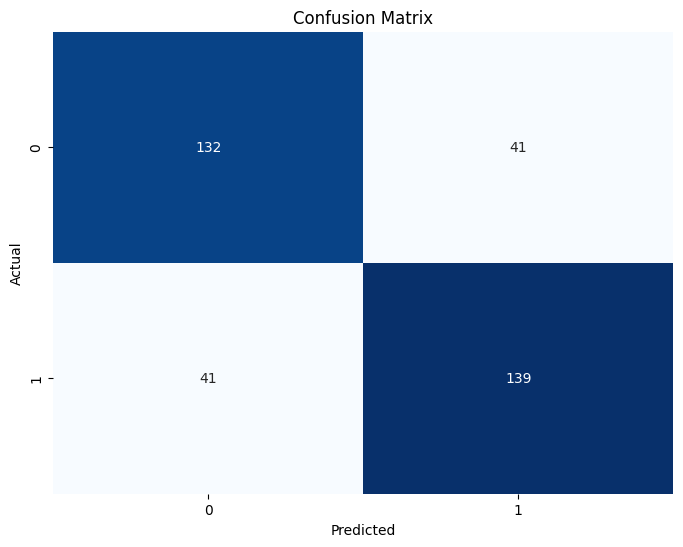

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       173
           1       0.77      0.77      0.77       180

    accuracy                           0.77       353
   macro avg       0.77      0.77      0.77       353
weighted avg       0.77      0.77      0.77       353



In [ ]:
best_rf_model = grid_search_rf.best_estimator_
joblib.dump(best_rf_model, 'rf_model.pkl')
joblib.dump(best_rf_model, 'rf_model.joblib')

['rf_model.joblib']

##Adaboost

In [ ]:
grid_search_adaboost.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 0.1,
 'n_estimators': 70}

In [ ]:
y_pred_adaboost = grid_search_adaboost.predict(X_test)

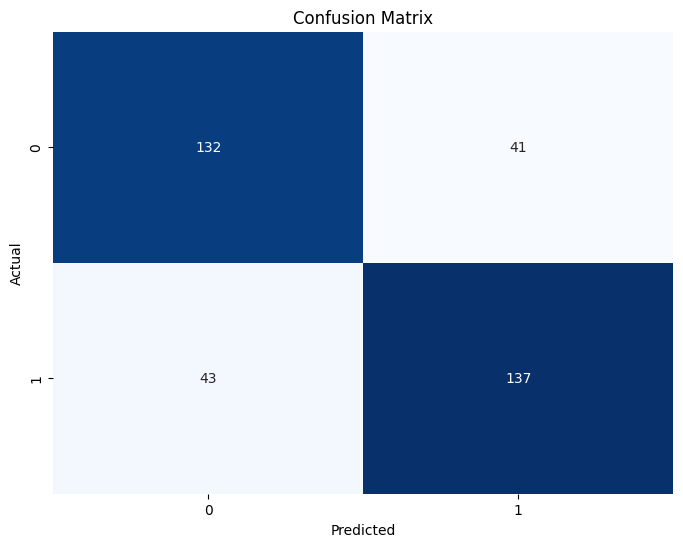

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       173
           1       0.77      0.76      0.77       180

    accuracy                           0.76       353
   macro avg       0.76      0.76      0.76       353
weighted avg       0.76      0.76      0.76       353



In [ ]:
best_adaboost_model = grid_search_adaboost.best_estimator_
joblib.dump(best_adaboost_model, 'adaboost_model.pkl')
joblib.dump(best_adaboost_model, 'adaboost_model.joblib')

['adaboost_model.joblib']